#Autolib electric car sharing service analysis

**Overview**


We will work as a Data Scientist for the Autolib electric car-sharing service company to investigate a claim about the blue cars from the provided Autolib dataset.




**Defining our research question**

We will try to understand bluecar usage during the weekends by comparing two different areas indicated by their postal code

Specific questions

1.   Is the number of bluecars taken in area 95880 different that in area 75012?
2.   Which day of the weekend were the bluecars taken most in the two areas?
1.   is there a difference between the sum of bluecars taken and the sum of bluecars returned?






Find more context and step by step analysis explanation here: https://docs.google.com/document/d/15bV_PE9YpPGUkWzPN-QwDwqQC7uTEisWcc5BoLuUxqM/edit?usp=sharing 

**Processing our dataset to understand electric car usage over time**

In [ ]:
##Importing our libraries

import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt




#1.0 Reading the Dataset

In [306]:
##Dataset url= http://bit.ly/DSCoreAutolibDataset


##autolib_df = pd.read_csv('autolib_daily_events_postal_code.csv')
##autolib_df

autolib_df= pd.read_csv('http://bit.ly/DSCoreAutolibDataset')


In [307]:
#Previewing the first 10 records of dataset

autolib_df.head(10)


,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
5,75001,1/6/2018,1437,5,weekend,187,185,6,6,7,8,38,35
6,75001,1/7/2018,1440,6,weekend,180,180,2,2,10,9,34,34
7,75001,1/8/2018,1438,0,weekday,84,83,3,3,10,10,14,15
8,75001,1/9/2018,1439,1,weekday,81,84,1,1,4,4,15,15
9,75001,1/10/2018,1440,2,weekday,88,85,5,5,11,11,23,22


In [308]:
#Previewing the last 10 records of dataset

autolib_df.tail(10)


,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16075,95880,6/10/2018,1440,6,weekend,34,32,0,0,1,0,0,0
16076,95880,6/11/2018,1440,0,weekday,17,18,0,0,0,0,0,0
16077,95880,6/12/2018,1439,1,weekday,25,25,0,0,0,0,0,0
16078,95880,6/13/2018,1440,2,weekday,12,13,0,0,1,1,0,0
16079,95880,6/14/2018,1439,3,weekday,15,13,0,0,0,0,0,0
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [309]:
#Data dimension
autolib_df.shape

(16085, 13)

In [310]:
##Finding uniques values
autolib_df.nunique()

Postal code               104
date                      156
n_daily_data_points        23
dayOfWeek                   7
day_type                    2
BlueCars_taken_sum        932
BlueCars_returned_sum     929
Utilib_taken_sum           48
Utilib_returned_sum        49
Utilib_14_taken_sum        92
Utilib_14_returned_sum     94
Slots_freed_sum           297
Slots_taken_sum           301
dtype: int64

In [311]:
#Confirming the datatypes
autolib_df.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

#2.0 Data Cleaning

In [ ]:
#From our initial data investigation above there are some things about our variables we would like to change:

#Completeness~ We will check for missing values in our dataset
#Consistency~ We need to rename some of our column names to be uniform and make it easy to work with
##We will also check for duplicates##Our date columns will be changed to datetime 
#Validity ~ We will drop columns that are irrelevant to our analysis
#Accuracy~ We will eliminate outliers 


**Checking for missing values**

In [312]:
autolib_df.isnull().sum()

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

In [ ]:
#There are no missing values in our datasets

Checking for duplicates

In [ ]:
autolib_df.duplicated().sum()

0

In [ ]:
#There are no duplicates in our dataset

  **Renaming the column names with uniform names**

In [313]:
#
autolib_df.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [314]:
autolib_df.rename(columns={"Postal code" : "postal_code", "BlueCars_taken_sum" :"blue_cars_taken_sum", "BlueCars_returned_sum" :"blue_cars_returned_sum","Utilib_returned_sum":"utilib_returned_sum","Utilib_taken_sum":"utilib_taken_sum","Utilib_14_taken_sum":"utilib_14_sum", "Utilib_14_returned_sum":"utilib_14_returned_sum", "Slots_freed_sum":"slots_freed_sum", "Slots_taken_sum":"slots_taken_sum", "dayOfWeek" : "day_of_week"},inplace = True)

In [315]:
#Confirming change of columns names
autolib_df.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'day_of_week', 'day_type',
       'blue_cars_taken_sum', 'blue_cars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

In [316]:
## We also noticed our date column listed as dtype object hence will convert it to datetime

##Importing the datetime library
from datetime import datetime

autolib_df['date'] = pd.to_datetime(autolib_df['date'], errors='coerce')

#Confirming the changed dtype
print(autolib_df.dtypes)

postal_code                        int64
date                      datetime64[ns]
n_daily_data_points                int64
day_of_week                        int64
day_type                          object
blue_cars_taken_sum                int64
blue_cars_returned_sum             int64
utilib_taken_sum                   int64
utilib_returned_sum                int64
utilib_14_sum                      int64
utilib_14_returned_sum             int64
slots_freed_sum                    int64
slots_taken_sum                    int64
dtype: object


**Dropping the columns and records that we do not need**

In [ ]:
##Since we are doing an analysis on a claim about blue cars, we will drop the following irrelevant columns
##utilib_taken_sum
##utilib_returned_sum
##utilib_14_sum
##utilib_14_returned_sum
##slots_freed_sum
##slots_taken_sum


In [317]:
#Remove all columns between column index 7 to 14

autolib_df.drop(autolib_df.iloc[:, 7:], inplace = True, axis = 1)



In [318]:
#Previewing our columns
autolib_df.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'day_of_week', 'day_type',
       'blue_cars_taken_sum', 'blue_cars_returned_sum'],
      dtype='object')

Using filter conditions to create our new dataset

In [415]:
#Since we are working with a specific day of the week type we need to create conditions that capture data in that frame
#Postal codes 95880 and 75012 and day of week = weekend
df1= autolib_df[(autolib_df.postal_code == 95880) & (autolib_df.day_type=='weekend')]
df2= autolib_df[(autolib_df.postal_code ==75012) & (autolib_df.day_type=='weekend')]
print(df1)
print(df2)



       postal_code       date  ...  blue_cars_taken_sum  blue_cars_returned_sum
15934        95880 2018-01-06  ...                   19                      22
15935        95880 2018-01-07  ...                   28                      17
15941        95880 2018-01-13  ...                   25                      26
15942        95880 2018-01-14  ...                   39                      31
15948        95880 2018-01-20  ...                   25                      20
15949        95880 2018-01-21  ...                   26                      21
15955        95880 2018-01-27  ...                   25                      24
15956        95880 2018-01-28  ...                   26                      20
15962        95880 2018-02-03  ...                   46                      53
15963        95880 2018-02-04  ...                   28                      21
15969        95880 2018-02-10  ...                   13                      15
15970        95880 2018-02-11  ...      

**Outliers**

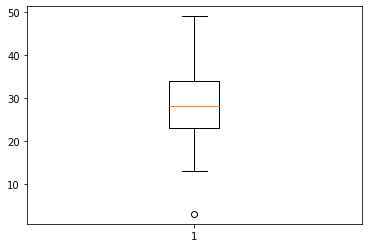

In [320]:
# Potstal Code 95880
plt.figure(figsize=(6,4))
plt.boxplot(df1['blue_cars_taken_sum'])
plt.show()

##Has outliers

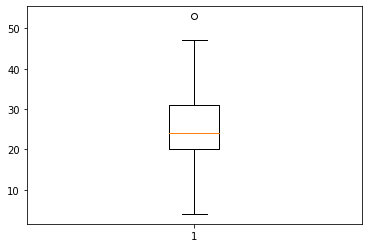

In [321]:
#Cars returned
plt.figure(figsize=(6,4))
plt.boxplot(df1['blue_cars_returned_sum'])
plt.show()

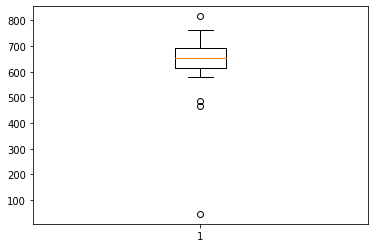

In [322]:
##Postal code 75012
plt.figure(figsize=(6,4))
plt.boxplot(df2['blue_cars_taken_sum'])
plt.show()

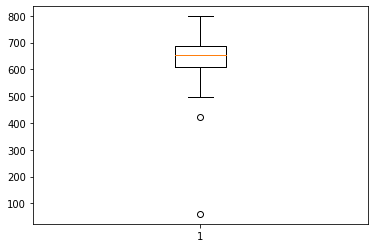

In [323]:
plt.figure(figsize=(6,4))
plt.boxplot(df2['blue_cars_returned_sum'])
plt.show()

Dealing with the outliers

In [416]:
below_10=df1[df1.blue_cars_taken_sum < 10].index
df1.drop(below_10, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [417]:
below_500=df2[df2.blue_cars_taken_sum < 500].index
df2.drop(below_500, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [418]:
below_10=df1[df1.blue_cars_returned_sum > 50].index
df1.drop(below_10, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [419]:
below_10=df2[df2.blue_cars_returned_sum < 500].index
df2.drop(below_10, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [420]:
frames = [df1, df2]
df = pd.concat(frames, sort=False)
df= df.drop(['n_daily_data_points'], axis = 1)
df

,postal_code,date,day_of_week,day_type,blue_cars_taken_sum,blue_cars_returned_sum
15934,95880,2018-01-06,5,weekend,19,22
15935,95880,2018-01-07,6,weekend,28,17
15941,95880,2018-01-13,5,weekend,25,26
15942,95880,2018-01-14,6,weekend,39,31
15948,95880,2018-01-20,5,weekend,25,20
...,...,...,...,...,...,...
1855,75012,2018-06-03,6,weekend,680,686
1861,75012,2018-06-09,5,weekend,727,724
1862,75012,2018-06-10,6,weekend,687,696
1868,75012,2018-06-16,5,weekend,734,707


In [339]:
df['postal_code']= df['postal_code'].astype('category')
df['day_of_week']= df['day_of_week'].astype('category')

In [337]:
df.duplicated().sum()

0

#3.0 Exploratory Data Analysis

**Univariate Analysis**

In [340]:
df.describe()

,blue_cars_taken_sum,blue_cars_returned_sum
count,83.000000,83.000000
mean,342.337349,338.939759
std,322.038260,321.718304
min,13.000000,15.000000
25%,28.000000,24.000000
50%,49.000000,47.000000
75%,655.500000,655.500000
max,816.000000,798.000000


Central Measure of Tendancy

In [341]:
#From the data above we can deduce the following central measures of tendancies
#MEAN

print('The mean of bluecars taken is: ' +str(df.blue_cars_taken_sum.mean()))
print('The mean of bluecars returned is: ' +str(df.blue_cars_returned_sum.mean()))

The mean of bluecars taken is: 342.33734939759034
The mean of bluecars returned is: 338.93975903614455


In [333]:
##VARIANCE

print('The variance of bluecars taken is: ' +str(df.blue_cars_taken_sum.var()))
print('The variance of bluecars returned is: ' +str(df.blue_cars_returned_sum.var()))

The variance of bluecars taken is: 103708.64090508377
The variance of bluecars returned is: 103502.66705847779


In [334]:
#SKEWNESS

print('The skewness of bluecars taken is: ' +str(df.blue_cars_taken_sum.skew()))
print('The skewness of bluecars returned is: ' +str(df.blue_cars_returned_sum.skew()))

#The values close to zero indicate that the symmetry of our data is close to a bell-shaped curve(normal distribution)



The skewness of bluecars taken is: 0.06437620998983849
The skewness of bluecars returned is: 0.06712089059725253


In [335]:
#KURTOSIS

print('The kurtosis of bluecars taken is: ' +str(df.blue_cars_taken_sum.kurt()))
print('The kutrosis of bluecars returned is: ' +str(df.blue_cars_returned_sum.kurt()))

The kurtosis of bluecars taken is: -1.9855497299137768
The kutrosis of bluecars returned is: -1.9828417084480185


In [342]:
#RANGE 

print('The range of bluecars taken is: ' +str(df.blue_cars_taken_sum.max()-df.blue_cars_taken_sum.min()))
print('The range of bluecars returned is: ' +str(df.blue_cars_returned_sum.max()-df.blue_cars_returned_sum.min()))

The range of bluecars taken is: 803
The range of bluecars returned is: 783


**Bivariate Analysis**

Categorical and Numerical

day_of_week
5    14649
6    13765
Name: blue_cars_taken_sum, dtype: int64


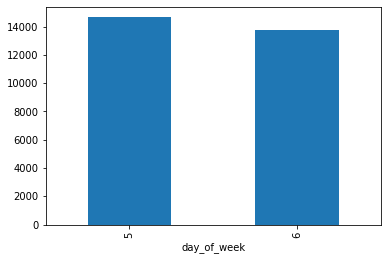

In [343]:
#Let us compare which day of the weekend has the highest sum of bluecars taken

print(df.groupby('day_of_week')['blue_cars_taken_sum'].sum())
df.groupby('day_of_week')['blue_cars_taken_sum'].sum().plot.bar()

##We can see that day 5 has a slightly higher number of blue cars taken in both areas but not significantly high

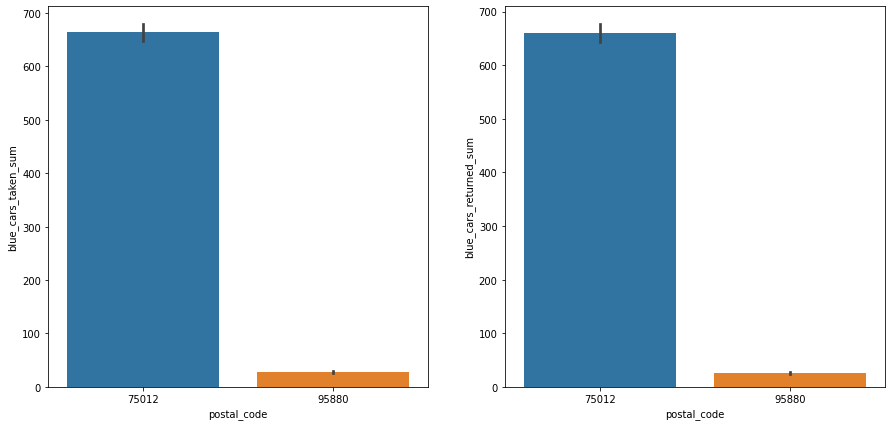

In [344]:
##Comparing the blue cars taken and blue cars returned at each postal code.
fig, (ax1, ax2)= plt.subplots(1,2, figsize=(15, 7))
fig.suptitle("")
sns.barplot(x= df.postal_code, y=df.blue_cars_taken_sum, ax=ax1)
sns.barplot(x= df.postal_code, y=df.blue_cars_returned_sum, ax=ax2)
plt.show()

We can deduce from the visualization above that the number of blue cars taken and those returned from postal code 75012 is way higher that those taken and returned in area postal code 95880. This is farther emphasised by the visualization below comparing the bluecars taken and blue cars returned to each postal address and day of the week

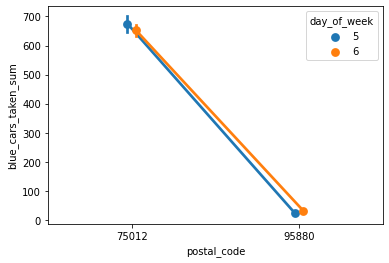

In [345]:
#Comparing the sum of blue cars taken and returned to our subject postal areas to the day of week.
ax = sns.pointplot(x="postal_code", y="blue_cars_taken_sum", hue="day_of_week",
                   data=df, dodge=True)

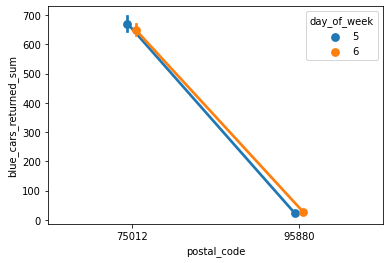

In [346]:
ax = sns.pointplot(x="postal_code", y="blue_cars_returned_sum", hue="day_of_week",
                   data=df, dodge=True)

General correlation overview

In [347]:
#Correlation
correlation= df.corr()
correlation

,blue_cars_taken_sum,blue_cars_returned_sum
blue_cars_taken_sum,1.000000,0.999521
blue_cars_returned_sum,0.999521,1.000000


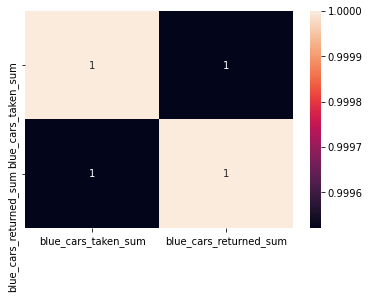

In [348]:
#Using Heatmaps to find the correlation of our numerical variables
sns.heatmap(correlation, 
            xticklabels = correlation.columns.values,
            yticklabels = correlation.columns.values,
            annot = True);

<Figure size 1008x1008 with 0 Axes>

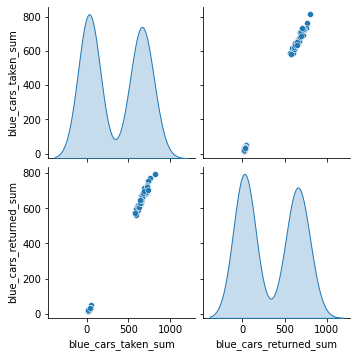

In [349]:
#Finding correlation between our variables using scatterplots
plt.figure(figsize=(14, 14))

sns.pairplot(df, diag_kind='kde');

There seems to be a strong direct relationship between the sum of blue cars taken and the sum of blue cars returned.

#4.0 Challenging our solution

We have found out from our basic analysis techniques above that:

1.  The sum of blue cars taken from postal code 75012 are higher than those taken from 95880
2.  The sum of blue cars returned from postal code 75012 are higher than those returned from 95880
1.   There is a strong relationship between the sum of blue cars taken and the sum of blue cars returned in each of the stations
 







**To challenge our solution:(relationship between bluecars taken and those returned) we will embark on hypothesis testing**

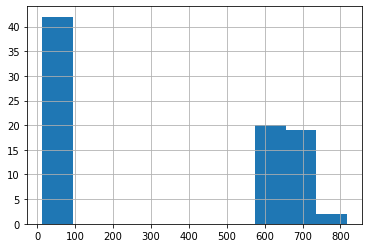

In [421]:
##Checking for normalcy in our distribution

df.blue_cars_taken_sum.hist()

In [441]:
df1= autolib_df[(autolib_df.postal_code == 95880) & (autolib_df.day_type=='weekend')]
df2= autolib_df[(autolib_df.postal_code ==75012) & (autolib_df.day_type=='weekend')]



In [442]:
##Choosing random saples from both independent groups to perform our hypothesis
import random

df1 = df1.sample(n = 25, replace="False")
df2 = df2.sample(n = 25, replace="False")

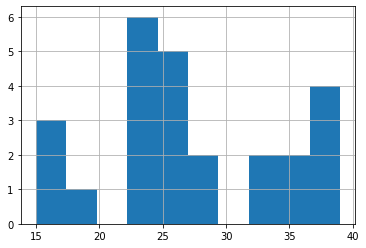

In [423]:
df1.blue_cars_taken_sum.hist()

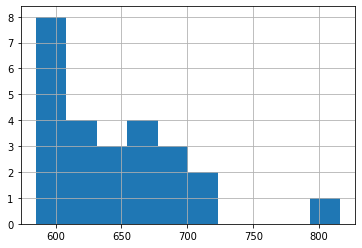

In [424]:
df2.blue_cars_taken_sum.hist()

In [ ]:
#From the normalcy testing above we notice that our data is not bell shaped 

##Step 1: Stating our hypothesis

#Null Hypothesis: There is no difference in the sum of bluecars taken and sum of bluecars returned in area 95880
#Alternate hypothesis: There is a difference in the sum of bluecars taken in areas 95880
Ho: Θ=Θo (The sum of bluecars taken and those returned in area 95880 are equal)
Ha: Θ ≠ Θo (The sum of bluecars taken and those returned in the postal code 95880 not equal )
##This means that it is going to be a two sided test

In [ ]:
##Setting our significance level or alpha
#Our alpha is going to be 0.05

In [449]:

##In order to decide on the test, we need to check whether the two populations have equal variances or not. As a rule of thumb, we can assume the populations have equal variances if the ratio of the larger sample variance to the smaller sample variance is less than 4:1. 

print(np.var(df1['blue_cars_taken_sum']), np.var(df1['blue_cars_returned_sum']))
##we can assume that the population variances are not equal since the ratio is greater than 4:1

88.13439999999999 68.0384


In [450]:
##We can then proceed to perform the Mann–Whitney U test (also called the Mann–Whitney–Wilcoxon (MWW), Wilcoxon rank-sum test (WRS), or Wilcoxon–Mann–Whitney test)

import scipy.stats as stats

stats.mannwhitneyu(df1['blue_cars_taken_sum'], df1['blue_cars_returned_sum'], alternative='two-sided')


MannwhitneyuResult(statistic=368.0, pvalue=0.2847416619076215)

In [451]:
##Doing the same for postal code 75012

stats.mannwhitneyu(df2['blue_cars_taken_sum'], df2['blue_cars_returned_sum'], alternative='two-sided')


MannwhitneyuResult(statistic=316.0, pvalue=0.9535490780423267)

Interpreting our results

In [ ]:
##our pvalues are 0.28 (rounded off) and 0.95 (rounded off) which compared to our alpha 0.05 is greater.
#p>alpha 
#thus we fail to reject the null hypothesis. We do not have sufficient evidence to say that the mean is different between the two groups.

**Conclusion**

Challenging our solution through hypothesis testin proves that our findings as had been stated challenging the solution are true